In [ ]:
%load_ext rpy2.ipython

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pingouin as pg

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
%%R
options(max.print=50)

In [ ]:
plt.rc('font', family='nanumgothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
pip install --upgrade pingouin

# 1

In [ ]:
%%R
mat <- read.csv("/content/drive/MyDrive/st_data/제01장/학력조사결과.csv", fileEncoding='euc-kr')
dim(mat)

[1] 800  12


In [ ]:
%%R
head(mat)

  ID 성별   동아리 진로 의욕 사전점수 국어 사회 수학 과학 영어 사후점수
1  1    F   무소속 문과   54      269   59   62   58   55   53      287
2  2    F 인문계열 문과   25      162   49   53   62   53   55      272
3  3    M 인문계열 문과   25      123   43   43   37   32   37      192
4  4    F   무소속 문과   48      176   63   49   54   40   52      258
 [ reached 'max' / getOption("max.print") -- omitted 2 rows ]


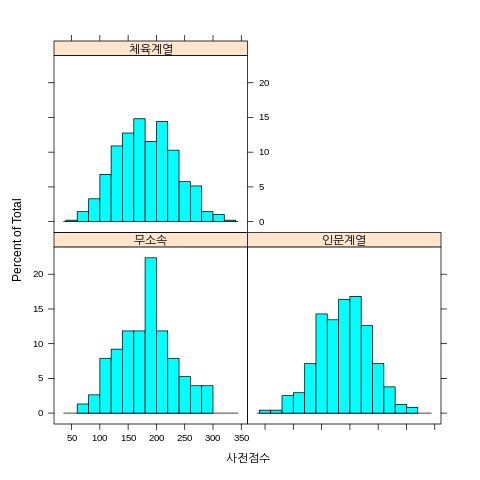

In [ ]:
%%R
library(lattice)
histogram(~사전점수|동아리, data=mat, breaks=15)

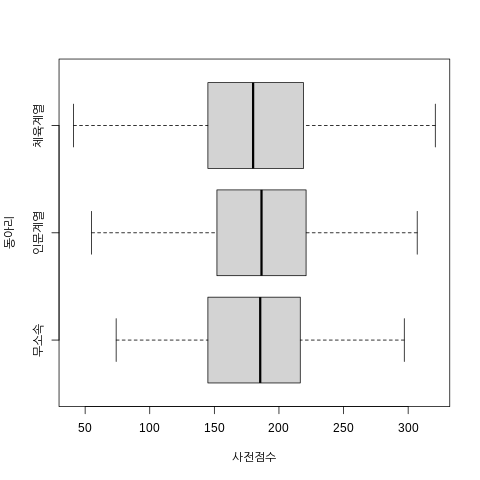

In [ ]:
%%R
boxplot(사전점수~동아리, data=mat, horizontal=TRUE)

In [ ]:
mat = pd.read_csv("/content/drive/MyDrive/st_data/제01장/학력조사결과.csv", encoding='euc-kr')
mat.shape

(800, 12)

In [ ]:
mat.head()

,ID,성별,동아리,진로,의욕,사전점수,국어,사회,수학,과학,영어,사후점수
0,1,F,무소속,문과,54,269,59,62,58,55,53,287
1,2,F,인문계열,문과,25,162,49,53,62,53,55,272
2,3,M,인문계열,문과,25,123,43,43,37,32,37,192
3,4,F,무소속,문과,48,176,63,49,54,40,52,258
4,5,M,체육계열,문과,41,172,55,56,40,58,44,253


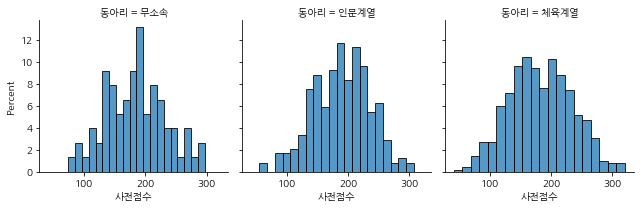

In [ ]:
g = sns.FacetGrid(mat, col='동아리')
g.map(sns.histplot, '사전점수', bins=20, stat='percent')
plt.show()

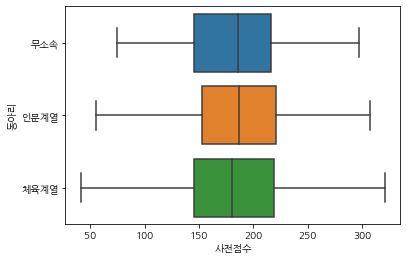

In [ ]:
sns.boxplot(x='사전점수', y='동아리', data=mat)
plt.show()

# 2

In [ ]:
%%R
tapply(mat$사전점수, mat$동아리, mean)

  무소속 인문계열 체육계열 
183.5000 188.8655 182.6379 


In [ ]:
%%R
tapply(mat$사전점수, mat$동아리, median)

  무소속 인문계열 체육계열 
   185.5    186.5    180.0 


In [ ]:
%%R
tapply(mat$사전점수, mat$동아리, sd)

  무소속 인문계열 체육계열 
49.18550 46.30607 51.48008 


In [ ]:
mat['사전점수'].groupby(mat['동아리']).agg(['mean', 'median', 'std'])

,mean,median,std
동아리,,,
무소속,183.500000,185.5,49.185499
인문계열,188.865546,186.5,46.306068
체육계열,182.637860,180.0,51.480078


# 3

In [ ]:
%%R
t.test(수학~성별, data=mat, var.equal=TRUE)


	Two Sample t-test

data:  수학 by 성별
t = -0.30619, df = 798, p-value = 0.7595
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -1.742079  1.271932
sample estimates:
mean in group F mean in group M 
       54.12879        54.36386 



In [ ]:
%%R
female = mat[mat$성별=='F', '수학']
male = mat[mat$성별=='M', '수학']

effectd1 <- function(x1, x2, ci=0.95){
    m1 = mean(x1)
    m2 = mean(x2)
    n1 = length(x1)
    n2 = length(x2)
    s1 = sd(x1)
    s2 = sd(x2)
    spooled = sqrt(((n1 - 1) * s1 ^ 2 + (n2 - 1) * s2 ^ 2) / (n1 + n2 - 2))
    d = (m1 - m2) / spooled
    return(d)
}

effectd1(female, male)

[1] -0.02165224


In [ ]:
male = mat.loc[mat.성별 == 'M', '수학']
female = mat.loc[mat.성별 == 'F', '수학']
st.ttest_ind(female, male)

Ttest_indResult(statistic=-0.3061935630225848, pvalue=0.7595371390467393)

In [ ]:
def effectd1(x1, x2, ci=0.95):
  n1, n2 = len(x1), len(x2)
  m1, m2 = x1.mean(), x2.mean()
  s1, s2 = x1.std(), x2.std()
  spooled = np.sqrt(((n1 - 1) * (s1**2) + (n2 - 1) * (s2**2)) / (n1+n2-2))
  d = (m1 - m2) / spooled
  return d
effectd1(female, male)

-0.021652237115816455

In [ ]:
female.std()

10.667166211451798

5% 수준에서 수학 평균에 성별 차이는 나타나지 않았다.

$t(798) = -0.306, d= 0.022$

confidence interval은 '일단은' 생략한다. 바인더 가지고 연구 좀 해보자.

In [ ]:
pg.ttest(male, female)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.306299,797.837385,two-sided,0.759457,"[-1.27, 1.74]",0.021652,0.083,0.060782


In [ ]:
import scipy
scipy.__version__

'1.7.2'

# 4

In [ ]:
mat

,ID,성별,동아리,진로,의욕,사전점수,국어,사회,수학,과학,영어,사후점수
0,1,F,무소속,문과,54,269,59,62,58,55,53,287
1,2,F,인문계열,문과,25,162,49,53,62,53,55,272
2,3,M,인문계열,문과,25,123,43,43,37,32,37,192
3,4,F,무소속,문과,48,176,63,49,54,40,52,258
4,5,M,체육계열,문과,41,172,55,56,40,58,44,253
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,M,무소속,문과,43,177,48,47,41,47,40,223
796,797,M,체육계열,이과,39,68,48,42,52,45,59,246
797,798,F,체육계열,문과,44,244,62,62,58,37,65,284
798,799,F,체육계열,이과,57,135,33,47,62,56,52,250


In [ ]:
%%R
scores <- c('사전점수', '사후점수')
goukei <- apply(mat[, scores], 1, sum)
goukei

 [1] 556 434 315 434 425 325 439 553 512 457 361 474 422 538 438 274 426 614 418
[20] 499 560 463 561 460 464 573 289 449 482 333 350 488 403 430 376 399 316 516
[39] 458 474 433 466 556 289 384 547 481 518 431 411
 [ reached getOption("max.print") -- omitted 750 entries ]


In [ ]:
scores = ['사전점수', '사후점수']
goukei = mat[scores].sum(axis=1)
goukei

0      556
1      434
2      315
3      434
4      425
      ... 
795    400
796    314
797    528
798    385
799    375
Length: 800, dtype: int64

# 5

In [ ]:
%%R
spre1 <- scale(mat$사전점수)
head(spre1)

           [,1]
[1,]  1.6954529
[2,] -0.4532956
[3,] -1.2364842
[4,] -0.1721509
[5,] -0.2524779
[6,] -0.8950943


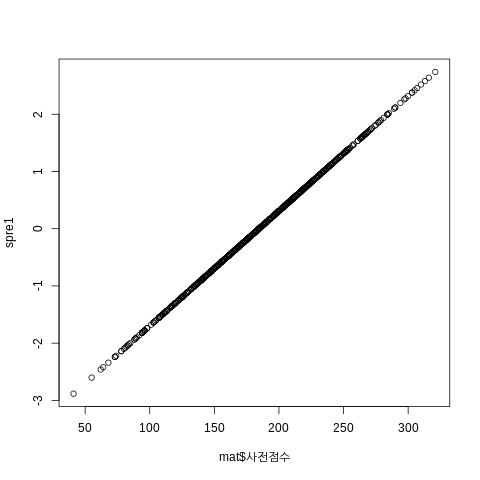

In [ ]:
%%R
plot(mat$사전점수, spre1)

In [ ]:
%%R
cor(mat$사전점수, spre1)

     [,1]
[1,]    1


In [ ]:
spre1 = (mat['사전점수'] - mat['사전점수'].mean()) / mat['사전점수'].std()
spre1

0      1.695453
1     -0.453296
2     -1.236484
3     -0.172151
4     -0.252478
         ...   
795   -0.152069
796   -2.340981
797    1.193409
798   -0.995503
799   -0.875013
Name: 사전점수, Length: 800, dtype: float64

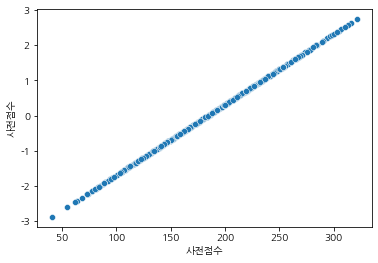

In [ ]:
sns.scatterplot(x=mat.사전점수, y=spre1)
plt.show()

In [ ]:
mat.사전점수.corr(spre1)

1.0

표준화되기 전의 분포와 표준화된 후의 분포의 상관계수는 1이다. 그러니까 순서가 같다.

분포의 원점과 단위가 바뀌지만, 데이터 간 상대적 위치 관계는 변하지 않는다.


# 6

In [ ]:
mat

,ID,성별,동아리,진로,의욕,사전점수,국어,사회,수학,과학,영어,사후점수
0,1,F,무소속,문과,54,269,59,62,58,55,53,287
1,2,F,인문계열,문과,25,162,49,53,62,53,55,272
2,3,M,인문계열,문과,25,123,43,43,37,32,37,192
3,4,F,무소속,문과,48,176,63,49,54,40,52,258
4,5,M,체육계열,문과,41,172,55,56,40,58,44,253
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,M,무소속,문과,43,177,48,47,41,47,40,223
796,797,M,체육계열,이과,39,68,48,42,52,45,59,246
797,798,F,체육계열,문과,44,244,62,62,58,37,65,284
798,799,F,체육계열,이과,57,135,33,47,62,56,52,250


In [ ]:
%%R
library(psych)
partial.r(mat, c('국어', '사회', '영어'), c('사전점수', '사후점수'))

partial correlations 
      국어  사회  영어
국어  1.00  0.02 -0.28
사회  0.02  1.00 -0.13
영어 -0.28 -0.13  1.00


In [ ]:
pg.partial_corr(data=mat, x='국어', y='사회', covar=['사전점수', '사후점수'])

,n,r,CI95%,p-val
pearson,800,0.017786,"[-0.05, 0.09]",0.615898


In [ ]:
pg.partial_corr(data=mat, x='국어', y='영어', covar=['사전점수', '사후점수'])

,n,r,CI95%,p-val
pearson,800,-0.27681,"[-0.34, -0.21]",1.673157e-15


In [ ]:
pg.partial_corr(data=mat, x='사회', y='영어', covar=['사전점수', '사후점수'])

,n,r,CI95%,p-val
pearson,800,-0.126203,"[-0.19, -0.06]",0.000352
